In [17]:
import pandas as pd
import numpy as np
data = pd.read_excel('Preprocessed_data.xlsx')
#data = pd.read_excel('/Preprocessed_data.xlsx') {for Collab}
data.head()
#print(len(data))

,backscatter_633,fluo_633,backsca_405,fluo_405_fad,fluo_405_porph,hemoglobin,scattering,r_cholesterol,r_phospholipid,r_lipid,r_carothenoid,r_heme,r_oxy_heme,r_protein,r_phenyalanine,grade,sickness
0,0.200,0.00720,1.265,745,550.0,0.00621,7.7,0.166952,0.247068,0.155787,0.158799,0.172018,0.209793,0.148646,0.050953,3,4
1,0.180,0.00160,1.265,745,550.0,0.00890,450.0,0.576808,1.064555,0.433863,0.186419,0.715583,0.208165,0.928731,0.411131,1,1
2,0.063,0.02900,1.265,745,550.0,0.00530,790.0,0.268545,0.354297,0.444609,0.061620,0.291459,0.349185,0.137399,0.072911,4,2
3,0.073,0.37000,1.265,745,550.0,0.00800,670.0,0.204152,0.312590,0.121034,0.240351,0.199706,0.689591,0.209187,0.458654,1,1
4,0.405,0.01335,1.265,745,550.0,0.00249,440.0,0.287308,0.700035,0.584047,0.099924,0.210506,0.152243,0.586474,0.204724,0,0


In [18]:
data_samples = data
# Meningioma
M = data_samples.loc[(data_samples['sickness']==1)]
M = M.drop(['sickness'], axis=1)
M.head()
#Glioblastoma
G = data_samples.loc[(data_samples['sickness']==2)]
G = G.drop(['sickness'], axis=1)
G.head()
#Metastasis
Me = data_samples.loc[(data_samples['sickness']==3)]
Me = Me.drop(['sickness'], axis=1)
Me.head()
#Oligodendroglioma
O = data_samples.loc[(data_samples['sickness']==4)]
O = O.drop(['sickness'], axis=1)
O.head()
#Asrocytoma
A = data_samples.loc[(data_samples['sickness']==5)]
A = A.drop(['sickness'], axis=1)
A.head()
S = ['Meningioma', 'Glioblastoma', 'Metastasis', 'Oligodendroglioma', 'Asrocytoma']
print(len(A.columns[0]))
# grade number 10 (if we start from 0)

15


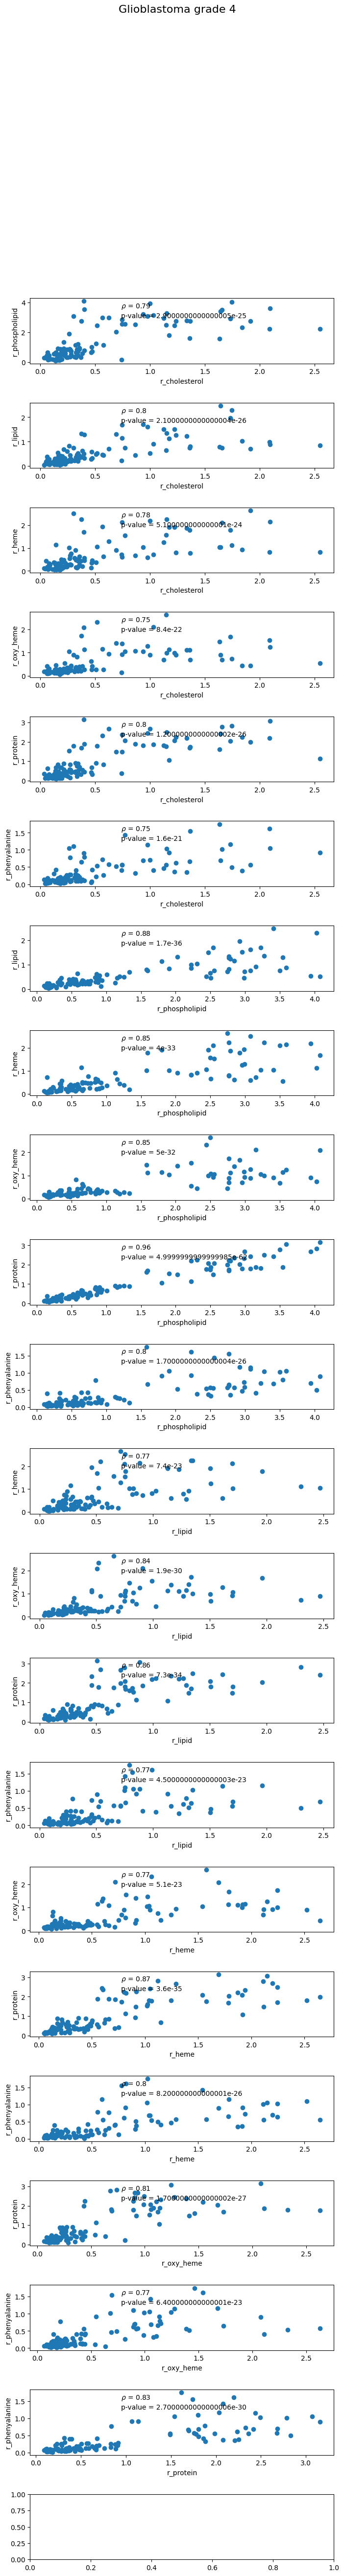

In [34]:
import math
from scipy import stats
import matplotlib.pyplot as plt
def round_to(num, digits=2):
    if num == 0: 
        return 0
    scale = int(-math.floor(math.log10(abs(num - int(num))))) + digits - 1
    if scale < digits: 
        scale = digits
    return round(num, scale)
def Visualization(Z, sickness, grade, l):
    fig, ax = plt.subplots(l-1, figsize=(8, 60))
    Label = sickness + ' grade ' + str(grade)
    fig.suptitle(Label, fontsize=16)
    k = 0
    for i in range(0, len(Z.columns)-2):
        for j in range(i+1, len(Z.columns)-1):
            sp_k, p = stats.spearmanr(Z.iloc[:,i], Z.iloc[:,j])
            if (abs(sp_k)>=0.7) and (p<=0.05):
                ax[k].scatter(Z.iloc[:,i], Z.iloc[:,j])
                ax[k].set_xlabel(Z.columns[i])
                ax[k].set_ylabel(Z.columns[j])
                sp_k = round_to(sp_k)
                p = round_to(p)
                label_1 = r'$\rho$ = ' + str(sp_k)
                label_2 = 'p-value = ' + str(p)
                ax[k].annotate(label_1, xy = (0.3, 0.85), size = 10, xycoords = ax[k].transAxes)
                ax[k].annotate(label_2, xy = (0.3, 0.7), size = 10, xycoords = ax[k].transAxes)
                k+=1
    #print('k=', k)
    
    plt.subplots_adjust(hspace = 0.6)
    
    plt.show()
def Spearm(X, col, sickness, grade):
    Y = X.loc[(X['grade']==grade)]
    l = 0
    #Z = X.iloc[:,0]
    Z = pd.DataFrame()
    #for i in range(5):
        #Y = X.loc[(X['grade']==i)]
        #if Y.empty:
          #continue
        #else:
    for j in range(0,len(col)-2):
        for k in range(j+1, len(col)-1):
            sp_k, p = stats.spearmanr(Y.iloc[:,j], Y.iloc[:,k])
            if (abs(sp_k)>=0.7) and (p<=0.05):
                l+=1
                if Y.columns[j] not in Z.columns:
                    Z = pd.concat([Z, Y.iloc[:,j]], axis=1, join='outer')
                if Y.columns[k] not in Z.columns:
                    Z = pd.concat([Z, Y.iloc[:,k]], axis=1, join='outer')
                #else:
    #print(l)
    Visualization(Z, sickness, grade, l)
    #return Z
#l = 0
grade = 4
#Y = Spearm(M, G.columns, S[0], grade)
Spearm(G, G.columns, S[1], grade)
#print(Y)
